<a href="https:///Machine_Learning_Models_with_SHAP_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Machine Learning Models with SHAP Values***

In [24]:
! pip install shap scikit-learn pandas matplotlib seaborn ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.6 MB/s eta 0:00:00


In [25]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
# Display the first few rows of the dataset
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
from sklearn.model_selection import train_test_split

# Features (input) and target (output)
X = df.drop(columns=['medv'])  # Input features (everything except the target)
y = df['medv']  # Target variable (house price)
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)
# Test the model
predictions = model.predict(X_test)
# Check model performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.901513892156864


In [28]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)
# Visualize the SHAP values for the first prediction
shap.initjs()  # Initialize JS visualization
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

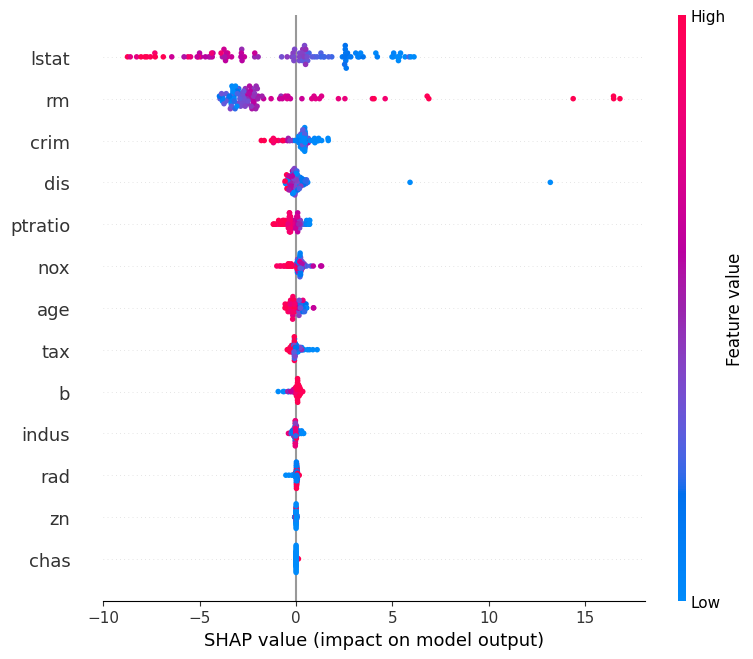

In [29]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [30]:
import ipywidgets as widgets
from IPython.display import display

# Create a slider to select data point
index_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, step=1, description='Data Point:')
# Function to update SHAP plot
def update_plot(index):
    shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index], matplotlib=True)
# Create an interactive plot
widgets.interact(update_plot, index=index_slider)

interactive(children=(IntSlider(value=0, description='Data Point:', max=101), Output()), _dom_classes=('widget…

<function __main__.update_plot(index)>

# **HAPPY COADING**